## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

        X1    X2    X3   X4     X5     X6    X7      X8   X9    X10   X11  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

      X12   X13     Y  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 



In [8]:
batch_size = 100
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### MSE Threshold and Mean Coeff Values 

1. Fetch MSE threshold for training the ABC-GAN 
2. The ABC-GAN will be trained until the threshold MSE is achieved or until it completes 5000 epochs 
3. The threshold mse is the mean mse of Catboost over 10 runs

In [9]:
books = sb.read_notebooks('./BaseLine_Model_Output')
catboostMSE = []
for nb in books.notebooks: 
    catboostMSE.append(nb.scraps['Catboost MSE'].data)
    
#Threshold MSE     
threshold_mse = mean(catboostMSE)

print(threshold_mse)

0.10094117185431159


# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [10]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.034573
0:	learn: 0.9806058	total: 57.7ms	remaining: 57.7s
1:	learn: 0.9606716	total: 58.8ms	remaining: 29.3s
2:	learn: 0.9390920	total: 59.7ms	remaining: 19.8s
3:	learn: 0.9209237	total: 60.9ms	remaining: 15.2s
4:	learn: 0.9046978	total: 62.1ms	remaining: 12.4s
5:	learn: 0.8896854	total: 63.3ms	remaining: 10.5s
6:	learn: 0.8724151	total: 64.3ms	remaining: 9.13s
7:	learn: 0.8558633	total: 65.3ms	remaining: 8.1s
8:	learn: 0.8400199	total: 66.1ms	remaining: 7.28s
9:	learn: 0.8229065	total: 66.9ms	remaining: 6.63s
10:	learn: 0.8057776	total: 67.7ms	remaining: 6.09s
11:	learn: 0.7907426	total: 68.5ms	remaining: 5.64s
12:	learn: 0.7753485	total: 69.3ms	remaining: 5.26s
13:	learn: 0.7601130	total: 70.1ms	remaining: 4.93s
14:	learn: 0.7475256	total: 70.9ms	remaining: 4.65s
15:	learn: 0.7326054	total: 71.8ms	remaining: 4.41s
16:	learn: 0.7206853	total: 72.6ms	remaining: 4.2s
17:	learn: 0.7077303	total: 73.9ms	remaining: 4.03s
18:	learn: 0.6955287	total: 75.3ms	remaining: 

98:	learn: 0.3101878	total: 148ms	remaining: 1.35s
99:	learn: 0.3091652	total: 149ms	remaining: 1.34s
100:	learn: 0.3073446	total: 150ms	remaining: 1.33s
101:	learn: 0.3059717	total: 151ms	remaining: 1.33s
102:	learn: 0.3044976	total: 152ms	remaining: 1.32s
103:	learn: 0.3030824	total: 152ms	remaining: 1.31s
104:	learn: 0.3013455	total: 153ms	remaining: 1.31s
105:	learn: 0.2996238	total: 154ms	remaining: 1.3s
106:	learn: 0.2980370	total: 155ms	remaining: 1.29s
107:	learn: 0.2965967	total: 156ms	remaining: 1.29s
108:	learn: 0.2951864	total: 157ms	remaining: 1.28s
109:	learn: 0.2942861	total: 158ms	remaining: 1.27s
110:	learn: 0.2932928	total: 159ms	remaining: 1.27s
111:	learn: 0.2916150	total: 160ms	remaining: 1.27s
112:	learn: 0.2903158	total: 161ms	remaining: 1.26s
113:	learn: 0.2893044	total: 162ms	remaining: 1.25s
114:	learn: 0.2880453	total: 162ms	remaining: 1.25s
115:	learn: 0.2868924	total: 163ms	remaining: 1.24s
116:	learn: 0.2854905	total: 164ms	remaining: 1.24s
117:	learn: 0.2

145:	learn: 0.2574131	total: 192ms	remaining: 1.12s
146:	learn: 0.2561256	total: 193ms	remaining: 1.12s
147:	learn: 0.2550767	total: 194ms	remaining: 1.11s
148:	learn: 0.2541599	total: 194ms	remaining: 1.11s
149:	learn: 0.2534840	total: 195ms	remaining: 1.1s
150:	learn: 0.2527124	total: 196ms	remaining: 1.1s
151:	learn: 0.2520669	total: 197ms	remaining: 1.1s
152:	learn: 0.2511829	total: 198ms	remaining: 1.09s
153:	learn: 0.2507161	total: 198ms	remaining: 1.09s
154:	learn: 0.2497802	total: 199ms	remaining: 1.08s
155:	learn: 0.2490613	total: 200ms	remaining: 1.08s
156:	learn: 0.2484356	total: 200ms	remaining: 1.08s
157:	learn: 0.2475208	total: 201ms	remaining: 1.07s
158:	learn: 0.2467460	total: 202ms	remaining: 1.07s
159:	learn: 0.2461317	total: 204ms	remaining: 1.07s
160:	learn: 0.2456028	total: 205ms	remaining: 1.06s
161:	learn: 0.2449256	total: 205ms	remaining: 1.06s
162:	learn: 0.2444113	total: 206ms	remaining: 1.06s
163:	learn: 0.2438126	total: 207ms	remaining: 1.06s
164:	learn: 0.2

311:	learn: 0.1734089	total: 339ms	remaining: 747ms
312:	learn: 0.1731178	total: 340ms	remaining: 746ms
313:	learn: 0.1727077	total: 341ms	remaining: 745ms
314:	learn: 0.1723778	total: 342ms	remaining: 743ms
315:	learn: 0.1720145	total: 343ms	remaining: 742ms
316:	learn: 0.1715627	total: 344ms	remaining: 741ms
317:	learn: 0.1714053	total: 345ms	remaining: 739ms
318:	learn: 0.1709797	total: 346ms	remaining: 739ms
319:	learn: 0.1706233	total: 347ms	remaining: 737ms
320:	learn: 0.1703284	total: 348ms	remaining: 736ms
321:	learn: 0.1700544	total: 349ms	remaining: 734ms
322:	learn: 0.1696955	total: 350ms	remaining: 733ms
323:	learn: 0.1695203	total: 350ms	remaining: 731ms
324:	learn: 0.1693707	total: 351ms	remaining: 730ms
325:	learn: 0.1690932	total: 352ms	remaining: 728ms
326:	learn: 0.1687871	total: 353ms	remaining: 727ms
327:	learn: 0.1684932	total: 354ms	remaining: 725ms
328:	learn: 0.1680740	total: 355ms	remaining: 724ms
329:	learn: 0.1676495	total: 356ms	remaining: 722ms
330:	learn: 

358:	learn: 0.1595903	total: 383ms	remaining: 683ms
359:	learn: 0.1593606	total: 384ms	remaining: 682ms
360:	learn: 0.1590600	total: 385ms	remaining: 681ms
361:	learn: 0.1587473	total: 385ms	remaining: 679ms
362:	learn: 0.1585815	total: 386ms	remaining: 678ms
363:	learn: 0.1583085	total: 387ms	remaining: 677ms
364:	learn: 0.1579830	total: 388ms	remaining: 675ms
365:	learn: 0.1576744	total: 389ms	remaining: 674ms
366:	learn: 0.1574980	total: 390ms	remaining: 672ms
367:	learn: 0.1573862	total: 391ms	remaining: 671ms
368:	learn: 0.1572274	total: 392ms	remaining: 670ms
369:	learn: 0.1568606	total: 393ms	remaining: 669ms
370:	learn: 0.1564609	total: 393ms	remaining: 667ms
371:	learn: 0.1560608	total: 394ms	remaining: 666ms
372:	learn: 0.1558547	total: 395ms	remaining: 664ms
373:	learn: 0.1555605	total: 396ms	remaining: 663ms
374:	learn: 0.1552292	total: 397ms	remaining: 661ms
375:	learn: 0.1549435	total: 398ms	remaining: 660ms
376:	learn: 0.1546544	total: 398ms	remaining: 659ms
377:	learn: 

518:	learn: 0.1250256	total: 529ms	remaining: 490ms
519:	learn: 0.1247722	total: 530ms	remaining: 489ms
520:	learn: 0.1245918	total: 531ms	remaining: 488ms
521:	learn: 0.1243609	total: 532ms	remaining: 487ms
522:	learn: 0.1243283	total: 533ms	remaining: 486ms
523:	learn: 0.1241885	total: 534ms	remaining: 485ms
524:	learn: 0.1240465	total: 535ms	remaining: 484ms
525:	learn: 0.1238986	total: 536ms	remaining: 483ms
526:	learn: 0.1237245	total: 537ms	remaining: 482ms
527:	learn: 0.1236307	total: 538ms	remaining: 481ms
528:	learn: 0.1233258	total: 539ms	remaining: 480ms
529:	learn: 0.1232458	total: 540ms	remaining: 479ms
530:	learn: 0.1230684	total: 541ms	remaining: 478ms
531:	learn: 0.1229753	total: 542ms	remaining: 477ms
532:	learn: 0.1229118	total: 543ms	remaining: 476ms
533:	learn: 0.1227483	total: 544ms	remaining: 475ms
534:	learn: 0.1227345	total: 545ms	remaining: 473ms
535:	learn: 0.1226136	total: 545ms	remaining: 472ms
536:	learn: 0.1225049	total: 546ms	remaining: 471ms
537:	learn: 

561:	learn: 0.1175936	total: 574ms	remaining: 447ms
562:	learn: 0.1174509	total: 575ms	remaining: 446ms
563:	learn: 0.1172948	total: 576ms	remaining: 445ms
564:	learn: 0.1171456	total: 577ms	remaining: 444ms
565:	learn: 0.1170940	total: 578ms	remaining: 443ms
566:	learn: 0.1169048	total: 579ms	remaining: 442ms
567:	learn: 0.1167425	total: 580ms	remaining: 441ms
568:	learn: 0.1166102	total: 581ms	remaining: 440ms
569:	learn: 0.1164306	total: 582ms	remaining: 439ms
570:	learn: 0.1162908	total: 582ms	remaining: 437ms
571:	learn: 0.1161027	total: 583ms	remaining: 436ms
572:	learn: 0.1159918	total: 584ms	remaining: 435ms
573:	learn: 0.1157478	total: 585ms	remaining: 434ms
574:	learn: 0.1155859	total: 586ms	remaining: 433ms
575:	learn: 0.1154385	total: 587ms	remaining: 432ms
576:	learn: 0.1153858	total: 588ms	remaining: 431ms
577:	learn: 0.1153157	total: 589ms	remaining: 430ms
578:	learn: 0.1150992	total: 590ms	remaining: 429ms
579:	learn: 0.1147799	total: 590ms	remaining: 428ms
580:	learn: 

706:	learn: 0.0966381	total: 705ms	remaining: 292ms
707:	learn: 0.0966189	total: 706ms	remaining: 291ms
708:	learn: 0.0965242	total: 707ms	remaining: 290ms
709:	learn: 0.0964063	total: 708ms	remaining: 289ms
710:	learn: 0.0961943	total: 709ms	remaining: 288ms
711:	learn: 0.0960212	total: 709ms	remaining: 287ms
712:	learn: 0.0958473	total: 710ms	remaining: 286ms
713:	learn: 0.0957051	total: 711ms	remaining: 285ms
714:	learn: 0.0955957	total: 712ms	remaining: 284ms
715:	learn: 0.0954229	total: 713ms	remaining: 283ms
716:	learn: 0.0953297	total: 714ms	remaining: 282ms
717:	learn: 0.0952661	total: 715ms	remaining: 281ms
718:	learn: 0.0951403	total: 715ms	remaining: 280ms
719:	learn: 0.0950328	total: 716ms	remaining: 279ms
720:	learn: 0.0948868	total: 717ms	remaining: 277ms
721:	learn: 0.0948780	total: 718ms	remaining: 276ms
722:	learn: 0.0947437	total: 719ms	remaining: 275ms
723:	learn: 0.0945983	total: 720ms	remaining: 274ms
724:	learn: 0.0944727	total: 720ms	remaining: 273ms
725:	learn: 

757:	learn: 0.0905546	total: 750ms	remaining: 239ms
758:	learn: 0.0904137	total: 751ms	remaining: 239ms
759:	learn: 0.0903441	total: 752ms	remaining: 238ms
760:	learn: 0.0902583	total: 753ms	remaining: 237ms
761:	learn: 0.0901566	total: 754ms	remaining: 236ms
762:	learn: 0.0900882	total: 755ms	remaining: 234ms
763:	learn: 0.0899894	total: 756ms	remaining: 233ms
764:	learn: 0.0898732	total: 757ms	remaining: 232ms
765:	learn: 0.0897384	total: 758ms	remaining: 231ms
766:	learn: 0.0896966	total: 759ms	remaining: 230ms
767:	learn: 0.0895544	total: 759ms	remaining: 229ms
768:	learn: 0.0893441	total: 760ms	remaining: 228ms
769:	learn: 0.0891873	total: 761ms	remaining: 227ms
770:	learn: 0.0890086	total: 762ms	remaining: 226ms
771:	learn: 0.0888501	total: 763ms	remaining: 225ms
772:	learn: 0.0886622	total: 764ms	remaining: 224ms
773:	learn: 0.0885537	total: 765ms	remaining: 223ms
774:	learn: 0.0884440	total: 766ms	remaining: 222ms
775:	learn: 0.0883600	total: 767ms	remaining: 221ms
776:	learn: 

930:	learn: 0.0740163	total: 895ms	remaining: 66.4ms
931:	learn: 0.0739314	total: 896ms	remaining: 65.4ms
932:	learn: 0.0738401	total: 897ms	remaining: 64.4ms
933:	learn: 0.0737398	total: 898ms	remaining: 63.5ms
934:	learn: 0.0736677	total: 899ms	remaining: 62.5ms
935:	learn: 0.0735927	total: 900ms	remaining: 61.5ms
936:	learn: 0.0734929	total: 901ms	remaining: 60.6ms
937:	learn: 0.0733790	total: 902ms	remaining: 59.6ms
938:	learn: 0.0733648	total: 903ms	remaining: 58.6ms
939:	learn: 0.0732843	total: 903ms	remaining: 57.7ms
940:	learn: 0.0732315	total: 904ms	remaining: 56.7ms
941:	learn: 0.0731403	total: 905ms	remaining: 55.7ms
942:	learn: 0.0730199	total: 906ms	remaining: 54.8ms
943:	learn: 0.0729180	total: 907ms	remaining: 53.8ms
944:	learn: 0.0728465	total: 908ms	remaining: 52.8ms
945:	learn: 0.0728162	total: 909ms	remaining: 51.9ms
946:	learn: 0.0726765	total: 910ms	remaining: 50.9ms
947:	learn: 0.0726307	total: 911ms	remaining: 50ms
948:	learn: 0.0725315	total: 912ms	remaining: 49

980:	learn: 0.0701088	total: 940ms	remaining: 18.2ms
981:	learn: 0.0700578	total: 941ms	remaining: 17.3ms
982:	learn: 0.0700271	total: 942ms	remaining: 16.3ms
983:	learn: 0.0699035	total: 943ms	remaining: 15.3ms
984:	learn: 0.0697808	total: 944ms	remaining: 14.4ms
985:	learn: 0.0696729	total: 944ms	remaining: 13.4ms
986:	learn: 0.0695978	total: 946ms	remaining: 12.5ms
987:	learn: 0.0695103	total: 947ms	remaining: 11.5ms
988:	learn: 0.0694633	total: 948ms	remaining: 10.5ms
989:	learn: 0.0693641	total: 949ms	remaining: 9.58ms
990:	learn: 0.0693544	total: 950ms	remaining: 8.62ms
991:	learn: 0.0692877	total: 950ms	remaining: 7.66ms
992:	learn: 0.0691795	total: 951ms	remaining: 6.71ms
993:	learn: 0.0690561	total: 952ms	remaining: 5.75ms
994:	learn: 0.0689593	total: 953ms	remaining: 4.79ms
995:	learn: 0.0688740	total: 954ms	remaining: 3.83ms
996:	learn: 0.0688345	total: 955ms	remaining: 2.87ms
997:	learn: 0.0688269	total: 956ms	remaining: 1.92ms
998:	learn: 0.0687463	total: 957ms	remaining: 

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.11696292075311894


#### Sanity Checks 

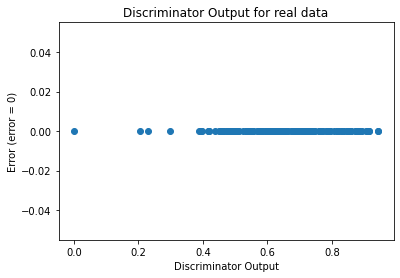

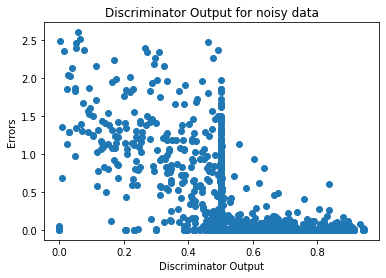

In [14]:
sanityChecks.discProbVsError(real_dataset,disc,device)

**Training ABC-GAN until mse of y_pred is > baseline_mse or n_epochs < 5000**

In [15]:
gen2 = network.Generator(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

In [16]:
discLossA2,genLossA2 = ABC_train_test2.training_GAN_2(disc2,gen2,disc_opt,gen_opt,train_data,test_data,batch_size,threshold_mse,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_2 Generator Loss",genLossA2)
sb.glue("ABC_GAN_2 Discriminator Loss",discLossA2)

Number of epochs 130


In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,"2",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MSE")
print(mean(ABC_GAN2_metrics[0]))

MSE
0.0960529885245038


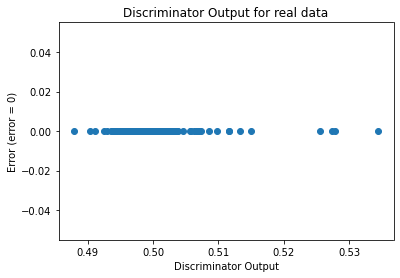

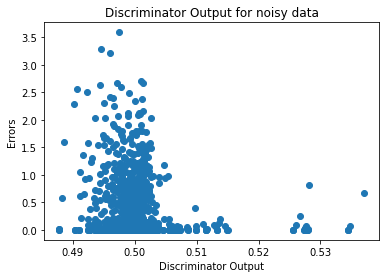

In [18]:
sanityChecks.discProbVsError(real_dataset,disc2,device)

# ABC - GAN Model with skip connection

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.025113699985798307


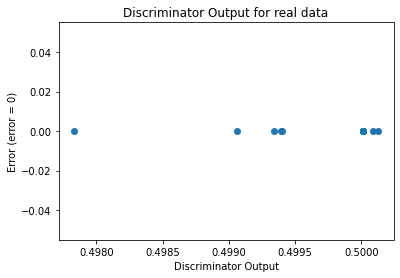

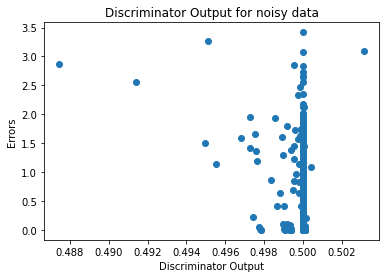

In [22]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [23]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1399]], requires_grad=True)
